In [52]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import genfromtxt
from numpy import argmax
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.optimizers import SGD,RMSprop,adam
from keras import callbacks

from sklearn.metrics import classification_report,confusion_matrix
import itertools

import matplotlib.pyplot as plt

train_path = 'C:/Users/PagolPoka/Desktop/Deep_Learning_Project/NATOPS/NATOPS_TRAIN.csv'
test_path = 'C:/Users/PagolPoka/Desktop/Deep_Learning_Project/NATOPS/NATOPS_TEST.csv'

epoch_num = 100

In [3]:
#Functions loading the csv files
def loadDatasetWithPandas(path, skiprowsNum):
    # Reading the raw data from csv file
    rawData = pd.read_csv(path, skiprows=skiprowsNum)
    return rawData

#Creating a Dataframe and Renaming the Columns
def createDataFrame(trainData):
    train_df = pd.DataFrame(data=trainData)
    train_df.rename(columns = {'24':'Label', '0':'Ftr_0', '1': 'Ftr_1', '2': 'Ftr_2', '3': 'Ftr_3', '4': 'Ftr_4', '5': 'Ftr_5', '6': 'Ftr_6', '7': 'Ftr_7', '8': 'Ftr_8'
                              , '9': 'Ftr_9', '10': 'Ftr_10', '11': 'Ftr_11',
       '12': 'Ftr_12', '13': 'Ftr_13', '14' : 'Ftr_14', '15': 'Ftr_15', '16': 'Ftr_16', '17': 'Ftr_17', '18': 'Ftr_18', '19': 'Ftr_19', '20': 'Ftr_20', '21': 'Ftr_21', '22': 'Ftr_22', '23': 'Ftr_23'}, inplace=True)
    
    return train_df


In [4]:
#trainData = genfromtxt(train_path, delimiter=',')
#trainData = trainData.astype('float')
#print(trainData.shape)
#print(trainData)


In [5]:
# Creating a data structure with 60 timesteps and 1 output
#  Xi_train = []
# y_train = []


# for i in range(51, 9181):
       
#     Xi_train.append(trainData[i-51:i, ])
#     #y_train.append(trainData[i-51:i ,0 ])
    
    
# Xi_train = np.array(X_train)

# train_y = np.array(Train_Lales.tail(X_train.shape[0]).values)



# data = array(train_y)
# # one hot encode
# Y_Train = to_categorical(data)

# print(X_train.shape)


# # Reshaping
# Xi_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

# #***************Use this two to fit into your model***************
# print(Xi_train.shape)
# print(Y_Train.shape)

In [6]:
#*******************Training Data Preparation********************
trainData = loadDatasetWithPandas(train_path, 0)
#print(trainData.columns)

Train_dataset = createDataFrame(trainData)
#print(Train_dataset.columns)

X_Train = Train_dataset[['Ftr_0', 'Ftr_1', 'Ftr_2', 'Ftr_3', 'Ftr_4', 'Ftr_5', 'Ftr_6',
       'Ftr_7', 'Ftr_8', 'Ftr_9', 'Ftr_10', 'Ftr_11', 'Ftr_12', 'Ftr_13',
       'Ftr_14', 'Ftr_15', 'Ftr_16', 'Ftr_17', 'Ftr_18', 'Ftr_19', 'Ftr_20',
       'Ftr_21', 'Ftr_22', 'Ftr_23']]
Train_Lales = Train_dataset[['Label']]

print("Training features: ",X_Train.columns)
print(" ")
print("Target: ",Train_Lales.columns)


Training features:  Index(['Ftr_0', 'Ftr_1', 'Ftr_2', 'Ftr_3', 'Ftr_4', 'Ftr_5', 'Ftr_6', 'Ftr_7',
       'Ftr_8', 'Ftr_9', 'Ftr_10', 'Ftr_11', 'Ftr_12', 'Ftr_13', 'Ftr_14',
       'Ftr_15', 'Ftr_16', 'Ftr_17', 'Ftr_18', 'Ftr_19', 'Ftr_20', 'Ftr_21',
       'Ftr_22', 'Ftr_23'],
      dtype='object')
 
Target:  Index(['Label'], dtype='object')


In [7]:
#*******************Test Data Preparation********************
testData = loadDatasetWithPandas(test_path, 0)
#print(testData.columns)

Test_dataset = createDataFrame(testData)
#print(Test_dataset.columns)

X_Test = Test_dataset[['Ftr_0', 'Ftr_1', 'Ftr_2', 'Ftr_3', 'Ftr_4', 'Ftr_5', 'Ftr_6',
       'Ftr_7', 'Ftr_8', 'Ftr_9', 'Ftr_10', 'Ftr_11', 'Ftr_12', 'Ftr_13',
       'Ftr_14', 'Ftr_15', 'Ftr_16', 'Ftr_17', 'Ftr_18', 'Ftr_19', 'Ftr_20',
       'Ftr_21', 'Ftr_22', 'Ftr_23']]
Test_Lales = Test_dataset[['Label']]



print("Test Data features: ",X_Test.columns)
print("")
print("Target: ",Test_Lales.columns)

Test Data features:  Index(['Ftr_0', 'Ftr_1', 'Ftr_2', 'Ftr_3', 'Ftr_4', 'Ftr_5', 'Ftr_6', 'Ftr_7',
       'Ftr_8', 'Ftr_9', 'Ftr_10', 'Ftr_11', 'Ftr_12', 'Ftr_13', 'Ftr_14',
       'Ftr_15', 'Ftr_16', 'Ftr_17', 'Ftr_18', 'Ftr_19', 'Ftr_20', 'Ftr_21',
       'Ftr_22', 'Ftr_23'],
      dtype='object')

Target:  Index(['Label'], dtype='object')


In [8]:
#**************Reshaping the Data for the Deep Learning model. LSTM expects a tesor of shape : [DataSample, TimeSteps, Features]*************
sequences = 51 #Lenght of each timestep
result = []

print("Train data shape: ", X_Train.shape)
print("Train target shape: ",Train_Lales.shape)


# for loop will walk for each of the total rows
for i in range(0,len(X_Train)):
    # every group must have the same length, so if current loop position i + number 
    # of sequences is higher than df length, breaks
    if i+sequences <= len(X_Train):
        # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
        result.append(X_Train[i:i+sequences].values)     

# Converting to array + keras takes float32 better than 64
train_x = np.array(result).astype('float32')

# making the y into same length as X
train_y = np.array(Train_Lales.tail(train_x.shape[0]).values)

#***************Converting the 6 class lables to OneHot Encoding format************************ 
data = array(train_y)
Y_Train = to_categorical(data)

# invert encoding
#inverted = argmax(Y_Train[0])
#print(inverted)

print("Train data shape: ", train_x.shape)
print("Train target shape: ",Y_Train.shape)


Train data shape:  (9180, 24)
Train target shape:  (9180, 1)
Train data shape:  (9130, 51, 24)
Train target shape:  (9130, 7)


In [9]:
#**************Reshaping the Test Data for the Deep Learning model. LSTM expects a tesor of shape : [DataSample, TimeSteps, Features]*************

sequences = 51 #Lenght of each timestep
result = []
#lables = []

# for loop will walk for each of the 1500 rows
for i in range(0,len(X_Test)):
    # every group must have the same length, so if current loop position i + number 
    # of sequences is higher than df length, breaks
    if i+sequences <= len(X_Test):
        # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
        result.append(X_Test[i:i+sequences].values)
        #lables.append(Test_Lales[i:i+sequences].values)
        


        


# Converting to array + keras takes float32 better than 64
test_x = np.array(result).astype('float32')
# making the y into same length as X
test_y = np.array(Test_Lales.tail(test_x.shape[0]).values)


#***************Converting the 6 class lables to OneHot Encoding format************************
data = array(test_y)
Y_Test = to_categorical(data)

# invert encoding
#inverted = argmax(Y_Train[0])
#print(inverted)

print("Test data shape: ", test_x.shape)
print("Train target shape: ", Y_Train.shape)

Test data shape:  (9130, 51, 24)
Train target shape:  (9130, 7)


In [10]:
print("An overview of how the data is packed. The data is packed into bins each containing 51 sequences. Each of these sequences have 24 features.")
print("***********Example of the packed train data for the 1st 3 TimeSeries or Bins**********")
print("")

for i in range (0,3):
    print("Training: ", train_x[i])
    print("Lable: ", Y_Test[i])
    print("")


An overview of how the data is packed. The data is packed into bins each containing 51 sequences. Each of these sequences have 24 features.
***********Example of the packed train data for the 1st 3 TimeSeries or Bins**********

Training:  [[-0.372758 -1.821679 -0.846321 ...  0.619205 -1.771773 -0.810086]
 [-0.367844 -1.841987 -0.846325 ...  0.617045 -1.79666  -0.818863]
 [-0.378445 -1.821358 -0.839571 ...  0.624789 -1.738568 -0.78806 ]
 ...
 [-0.537007 -1.751323 -0.60374  ...  0.541325 -1.691657 -0.716364]
 [-0.475939 -1.772353 -0.763048 ...  0.559272 -1.683121 -0.757526]
 [-0.479505 -1.761632 -0.793202 ...  0.571569 -1.721661 -0.741532]]
Lable:  [0. 0. 0. 0. 1. 0. 0.]

Training:  [[-0.367844 -1.841987 -0.846325 ...  0.617045 -1.79666  -0.818863]
 [-0.378445 -1.821358 -0.839571 ...  0.624789 -1.738568 -0.78806 ]
 [-0.386751 -1.845643 -0.848031 ...  0.6341   -1.749744 -0.816695]
 ...
 [-0.475939 -1.772353 -0.763048 ...  0.559272 -1.683121 -0.757526]
 [-0.479505 -1.761632 -0.793202 ...  

In [11]:
print("(Train shape) (Train Lable shape)")
print(train_x.shape, Y_Train.shape)
print(" ")
print("(Test shape) (Test Lable shape)")
print(test_x.shape, Y_Test.shape)

input_shape = (train_x.shape[1], train_x.shape[2])
print(" ")
print("Input Shape for the LSTM model")
print(input_shape)

(Train shape) (Train Lable shape)
(9130, 51, 24) (9130, 7)
 
(Test shape) (Test Lable shape)
(9130, 51, 24) (9130, 7)
 
Input Shape for the LSTM model
(51, 24)


In [12]:
# Design a LSTM model for training the multivariate timeseries data.
learning_rate = 0.01

Adam = adam(lr= learning_rate)
model_LSTM = Sequential()
model_LSTM.add(LSTM(32, input_shape=input_shape))
model_LSTM.add(Dropout(0.5))
model_LSTM.add(Dense(100, activation='relu'))
model_LSTM.add(Dense(7,activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam,metrics=['accuracy'])

model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                7296      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 707       
Total params: 11,303
Trainable params: 11,303
Non-trainable params: 0
_________________________________________________________________


In [13]:
#####################Training the LSTM model ###########################
print("**************************Training the LSTM model**************************")
filename='MultiVariate_LSTM_model_train.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=epoch_num, verbose=0, mode='min')

filepath="LSTM_Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]
history_LSTM = model_LSTM.fit(train_x, Y_Train, epochs=epoch_num, batch_size=51, validation_data=(test_x, Y_Test), verbose=1, shuffle=False,callbacks=callbacks_list)


**************************Training the LSTM model**************************
Train on 9130 samples, validate on 9130 samples
Epoch 1/100
9130/9130 [==============================] - 7s 774us/step - loss: 1.6480 - acc: 0.2818 - val_loss: 1.3238 - val_acc: 0.4023

Epoch 00001: val_loss improved from inf to 1.32377, saving model to LSTM_Best-weights-my_model-001-1.6480-0.2818.hdf5
Epoch 2/100
9130/9130 [==============================] - 5s 595us/step - loss: 1.3564 - acc: 0.3917 - val_loss: 1.3346 - val_acc: 0.3696

Epoch 00002: val_loss did not improve from 1.32377
Epoch 3/100
9130/9130 [==============================] - 5s 566us/step - loss: 1.2720 - acc: 0.3987 - val_loss: 1.1638 - val_acc: 0.4438

Epoch 00003: val_loss improved from 1.32377 to 1.16380, saving model to LSTM_Best-weights-my_model-003-1.2720-0.3987.hdf5
Epoch 4/100
9130/9130 [==============================] - 5s 573us/step - loss: 1.1901 - acc: 0.4438 - val_loss: 1.1373 - val_acc: 0.5035

Epoch 00004: val_loss improved fr

In [43]:
# Evaluation of The trained LSTM model

#Prediction on the test data by the trained LSTM 
result_LSTM = model_LSTM.predict(test_x)
classes_LSTM = model_LSTM.predict_classes(test_x)

#Evaluation in terms of test loss and test accuracy
test_loss_LSTM, test_acc_LSTM = model_LSTM.evaluate(test_x, Y_Test)

print("")
print("Test Loss")
print(test_loss_LSTM)
print("Test Accuracy")
print(test_acc_LSTM)


9130/9130 [==============================] - 2s 170us/step

Test Loss
1.2117487627961891
Test Accuracy
0.5650602409638554


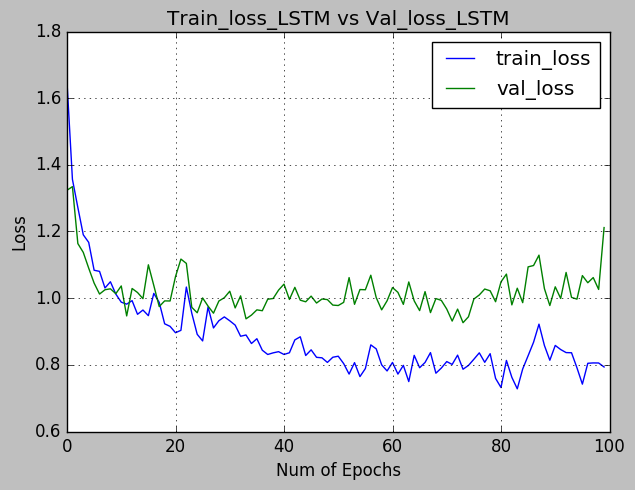

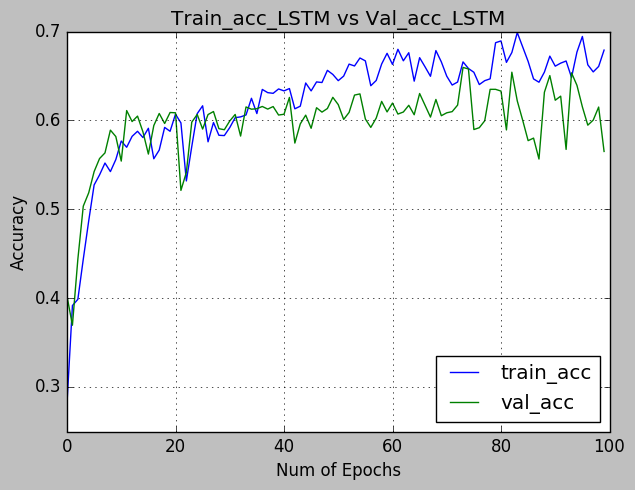

In [53]:
# visualizing losses and accuracy LSTM
train_loss_LSTM=history_LSTM.history['loss']
val_loss_LSTM=history_LSTM.history['val_loss']

train_acc_LSTM=history_LSTM.history['acc']
val_acc_LSTM=history_LSTM.history['val_acc']

xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_LSTM)
plt.plot(xc,val_loss_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Train_loss_LSTM vs Val_loss_LSTM')
plt.grid(True)
plt.legend(['train_loss','val_loss'], loc=1)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc_LSTM)
plt.plot(xc,val_acc_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Train_acc_LSTM vs Val_acc_LSTM')
plt.grid(True)
plt.legend(['train_acc','val_acc'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

In [54]:
# Design a CNN model for training the multivariate timeseries data.
learning_rate = 0.001

Adam = adam(lr= learning_rate)

model_cNN = Sequential()
model_cNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape= input_shape))
model_cNN.add(MaxPooling1D(pool_size=2))
model_cNN.add(Flatten())
model_cNN.add(Dense(50, activation='relu'))
model_cNN.add(Dropout(0.5))
model_cNN.add(Dense(7,activation='softmax'))
model_cNN.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

model_cNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 50, 64)            3136      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 25, 64)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                80050     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 357       
Total params: 83,543
Trainable params: 83,543
Non-trainable params: 0
_________________________________________________________________


In [55]:
#####################Training the CNN model ###########################
print("**************************Training the CNN model**************************")
filename='MultiVariate_CNN_model_train.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=epoch_num, verbose=0, mode='min')

filepath="CNN_Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

history_CNN = model_cNN.fit(train_x, Y_Train, epochs=epoch_num, batch_size=51, validation_data=(test_x, Y_Test), verbose=1, shuffle=False, callbacks=callbacks_list)

**************************Training the CNN model**************************
Train on 9130 samples, validate on 9130 samples
Epoch 1/100
9130/9130 [==============================] - 2s 252us/step - loss: 1.7185 - acc: 0.2820 - val_loss: 1.3917 - val_acc: 0.4735

Epoch 00001: val_loss improved from inf to 1.39166, saving model to CNN_Best-weights-my_model-001-1.7185-0.2820.hdf5
Epoch 2/100
9130/9130 [==============================] - 2s 188us/step - loss: 1.3302 - acc: 0.4414 - val_loss: 1.1476 - val_acc: 0.5647

Epoch 00002: val_loss improved from 1.39166 to 1.14762, saving model to CNN_Best-weights-my_model-002-1.3302-0.4414.hdf5
Epoch 3/100
9130/9130 [==============================] - 2s 194us/step - loss: 1.1741 - acc: 0.5091 - val_loss: 1.0458 - val_acc: 0.5710

Epoch 00003: val_loss improved from 1.14762 to 1.04583, saving model to CNN_Best-weights-my_model-003-1.1741-0.5091.hdf5
Epoch 4/100
9130/9130 [==============================] - 2s 190us/step - loss: 1.0964 - acc: 0.5457 - va

In [56]:
# Evaluation of The trained CNN model

#Prediction on the test data by the trained CNN 
result_CNN = model_cNN.predict(test_x)
classes_CNN = model_cNN.predict_classes(test_x)

#Evaluation in terms of test loss and test accuracy
test_loss_CNN, test_acc_CNN = model_cNN.evaluate(test_x, Y_Test)

print("")
print("Test Loss")
print(test_loss_CNN)
print("Test Accuracy")
print(test_acc_CNN)


9130/9130 [==============================] - 1s 56us/step

Test Loss
2.488282971942722
Test Accuracy
0.6539978094194961


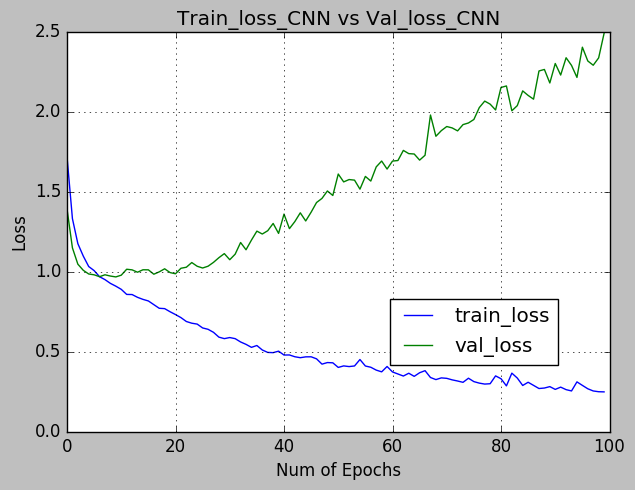

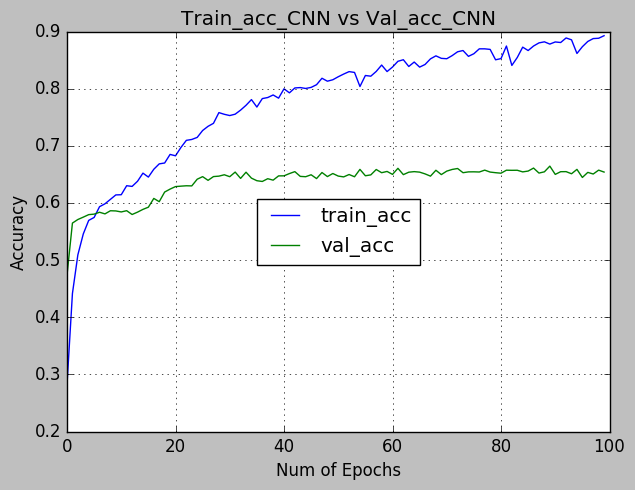

In [57]:
# visualizing losses and accuracy
train_loss_CNN=history_CNN.history['loss']
val_loss_CNN=history_CNN.history['val_loss']

train_acc_CNN=history_CNN.history['acc']
val_acc_CNN=history_CNN.history['val_acc']

xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_CNN)
plt.plot(xc,val_loss_CNN)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Train_loss_CNN vs Val_loss_CNN')
plt.grid(True)
plt.legend(['train_loss','val_loss'], loc=10, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc_CNN)
plt.plot(xc,val_acc_CNN)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Train_acc_CNN vs Val_acc_CNN')
plt.grid(True)
plt.legend(['train_acc','val_acc'],loc=10)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

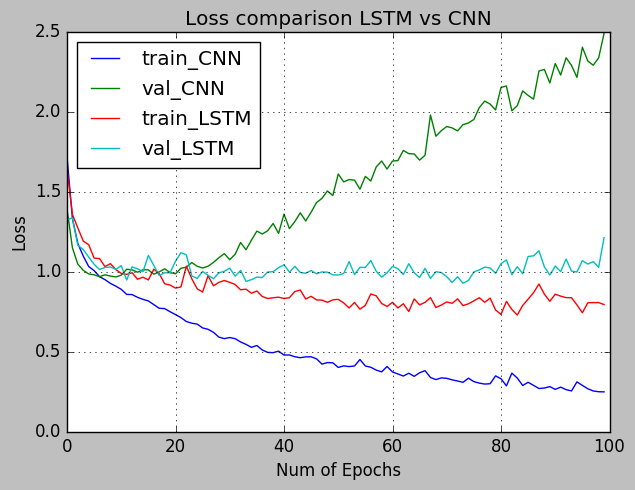

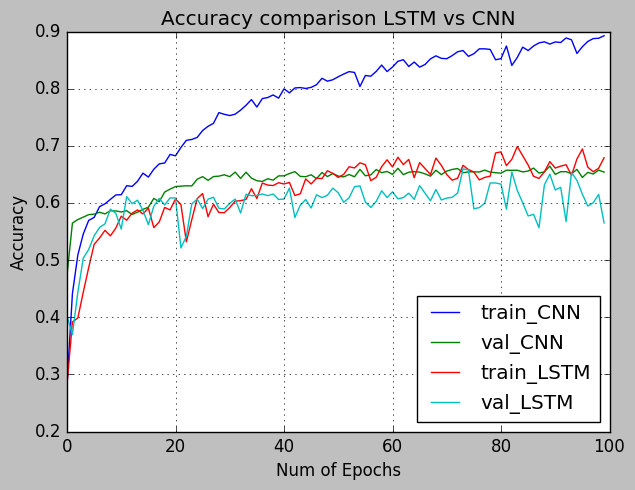

In [60]:
# visualizing losses and accuracy for CNN

xc=range(epoch_num)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss_CNN)
plt.plot(xc,val_loss_CNN)
plt.plot(xc,train_loss_LSTM)
plt.plot(xc,val_loss_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Loss comparison LSTM vs CNN')
plt.grid(True)
plt.legend(['train_CNN','val_CNN','train_LSTM','val_LSTM'], loc=2 )
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc_CNN)
plt.plot(xc,val_acc_CNN)
plt.plot(xc,train_acc_LSTM)
plt.plot(xc,val_acc_LSTM)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison LSTM vs CNN')
plt.grid(True)
plt.legend(['train_CNN','val_CNN', 'train_LSTM','val_LSTM'],loc=0)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

In [61]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

 class 0(0)       0.75      0.59      0.66      1530
 class 1(1)       0.52      0.60      0.56      1530
 class 2(2)       0.65      0.57      0.61      1530
 class 3(3)       0.70      0.68      0.69      1480
 class 4(4)       0.72      0.79      0.75      1530
 class 5(5)       0.61      0.70      0.66      1530

avg / total       0.66      0.65      0.65      9130

[[ 904  256  105   71   53  141]
 [ 127  911  253   52   37  150]
 [  42  329  869   87   68  135]
 [  21   61   29 1008  220  141]
 [  18   74   40   87 1204  107]
 [  94  106   34  129   92 1075]]

Confusion matrix, without normalization


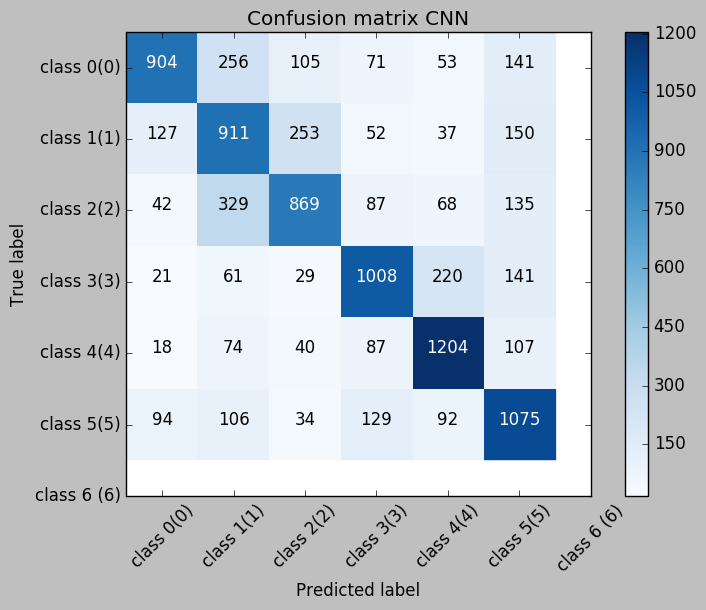

In [62]:
# Printing the confusion matrix for CNNS

y_pred = classes_CNN

target_names = ['class 0(0)','class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)','class 6 (6)']
print(classification_report(np.argmax(Y_Test,axis=1), y_pred,target_names=target_names))

cnf_matrix_CNN = confusion_matrix(np.argmax(Y_Test,axis=1), y_pred)
print(cnf_matrix_CNN)
print("")

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_CNN, classes=target_names,
                      title='Confusion matrix CNN')
plt.show()

             precision    recall  f1-score   support

 class 1(1)       0.91      0.07      0.13      1530
 class 2(2)       0.30      0.67      0.42      1530
 class 3(3)       0.66      0.44      0.52      1530
 class 4(4)       0.74      0.71      0.72      1480
 class 5(5)       0.75      0.76      0.75      1530
class 6 (6)       0.71      0.76      0.73      1530

avg / total       0.68      0.57      0.54      9130

[[ 104 1180   42   42   39  123]
 [   3 1024  308   43   63   89]
 [   1  666  669   68   33   93]
 [   2  122    0 1050  217   89]
 [   1  167    1  138 1156   67]
 [   3  241    1   87   42 1156]]

Confusion matrix, without normalization


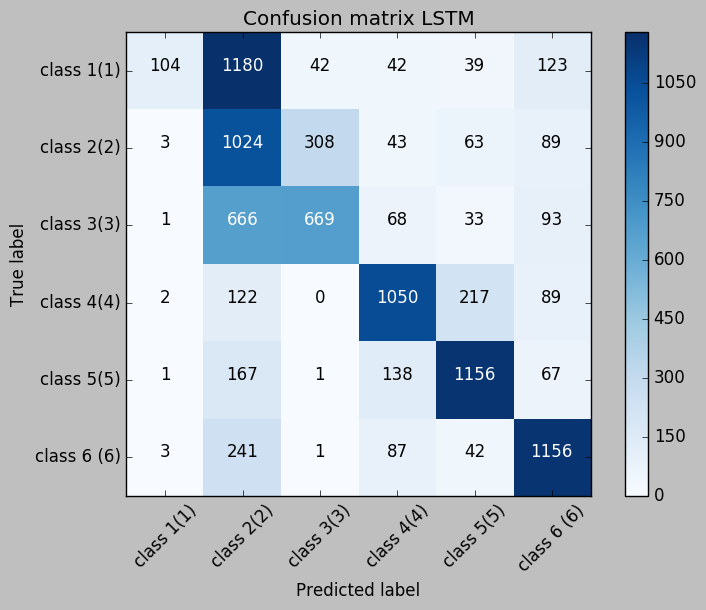

In [63]:


# Printing the confusion matrix for LSTM

y_pred = classes_LSTM

target_names_LSTM = ['class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)','class 6 (6)']

print(classification_report(np.argmax(Y_Test,axis=1), y_pred,target_names=target_names_LSTM))

cnf_matrix_CNN = confusion_matrix(np.argmax(Y_Test,axis=1), y_pred)
print(cnf_matrix_CNN)
print("")

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix_CNN, classes=target_names_LSTM,
                      title='Confusion matrix LSTM')
plt.show()